In [12]:
import tensorflow as tf
import keras
from keras import initializers
from keras.layers import Dense
from keras.models import Sequential
from keras import optimizers

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA


import sys
import os
# sys.path.insert(0, '../src/')

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [9]:
import numpy as np
import pandas as pd


data = np.loadtxt('/Users/sameedsajid/opt/anaconda3/pkgs/lammps-2022.06.23-py310h33d413e_mpich_0/bin/25JAN/50%/atom_information_in_SF_region_GLOBAL_atomtypenew.txt')

df = pd.DataFrame(data)

df.astype(int)


,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,2,2,1,1,1,2,2,2,2,1,...,2,1,1,1,2,2,2,2,1,1
1,1,1,1,2,2,2,2,1,1,1,...,2,2,2,2,2,1,2,2,1,2
2,2,1,2,1,2,1,1,1,1,1,...,2,2,1,2,2,1,1,2,2,2
3,1,1,1,1,1,1,1,1,1,2,...,2,1,2,1,2,1,1,1,2,2
4,2,2,1,2,1,1,1,2,1,1,...,2,1,2,1,1,1,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,1,2,1,2,2,1,1,1,1,...,1,2,2,1,1,2,1,1,2,1
996,1,2,1,1,2,2,1,1,1,2,...,2,1,1,2,1,1,2,2,1,1
997,2,2,2,2,2,2,2,1,2,2,...,2,2,2,2,2,1,1,1,1,2
998,1,2,1,1,1,2,1,1,2,2,...,1,2,1,2,2,2,1,1,2,1


Atom 1 in Nickel and atom 2 is Iron. We replace Iron with a 0 for simplicity. 1 represents nickel and 0 represents iron or no nickel

In [10]:
df2 = df.replace(2, 0)
# df2
df2 = df2.astype(int)
df2

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,0,0,1,1,1,0,0,0,0,1,...,0,1,1,1,0,0,0,0,1,1
1,1,1,1,0,0,0,0,1,1,1,...,0,0,0,0,0,1,0,0,1,0
2,0,1,0,1,0,1,1,1,1,1,...,0,0,1,0,0,1,1,0,0,0
3,1,1,1,1,1,1,1,1,1,0,...,0,1,0,1,0,1,1,1,0,0
4,0,0,1,0,1,1,1,0,1,1,...,0,1,0,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,0,1,0,0,1,1,1,1,...,1,0,0,1,1,0,1,1,0,1
996,1,0,1,1,0,0,1,1,1,0,...,0,1,1,0,1,1,0,0,1,1
997,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,1,1,0
998,1,0,1,1,1,0,1,1,0,0,...,1,0,1,0,0,0,1,1,0,1


Getting the labels which are the sfe values"

In [11]:
y_data = np.loadtxt('/Users/sameedsajid/opt/anaconda3/pkgs/lammps-2022.06.23-py310h33d413e_mpich_0/bin/25JAN/50%/myfile4.txt')

y_data.dtype
# df = pd.DataFrame(data)
y_data.shape


(1000,)

### PCA ###

In [7]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=10)

# df2 = pca.fit_transform(df2)
# print(df2.shape)

(1000, 2)


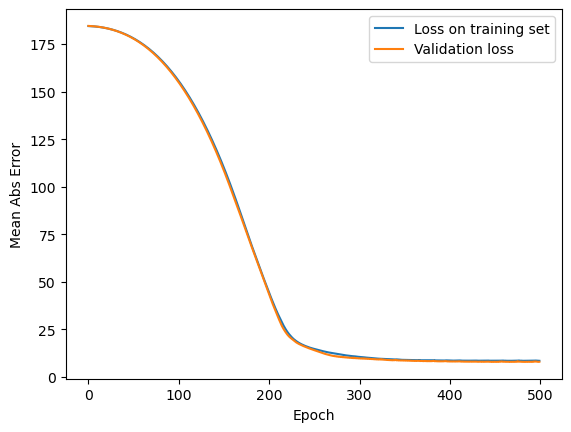

In [24]:
# EPOCH REAL TIME COUNTER CLASS
class PrintEpNum(keras.callbacks.Callback): # This is a function for the Epoch Counter
    def on_epoch_end(self, epoch, logs):
        sys.stdout.flush()
        sys.stdout.write("Current Epoch: " + str(epoch+1) + " Training Loss: " + "%4f" %logs.get('loss') + '                                       \r') # Updates current Epoch Number

EPOCHS = 500 # Number of EPOCHS

# HISTORY Object which contains how the model learned

# Training Values (Properties), Training Labels (Known Young's Moduli) 
history = model.fit(X_train_pca, y_train_pca, batch_size=X_train_pca.shape[0], 
                    epochs=EPOCHS, verbose = False, shuffle=False, validation_split=0.1, callbacks=[PrintEpNum()])


# PLOTTING HISTORY USING MATPLOTLIB

plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error')
plt.plot(history.epoch, np.array(history.history['mae']),label='Loss on training set') 
plt.plot(history.epoch, np.array(history.history['val_mae']),label = 'Validation loss')
plt.legend()
plt.show()

In [25]:
# model.save('modelpca.h5')
[loss, mae] = model.evaluate(X_test_pca, y_test_pca, verbose=0)

print("Testing Set Mean Absolute Error: {:2.2f}".format(mae))

#25.71 mae for 100 params, 
#9.6 for 10 params
#8.8 with 2 params

Testing Set Mean Absolute Error: 8.57


In [26]:
test_predictions_pca = model.predict(X_test_pca).flatten()

# print("Elements in Test Set: ", labeled_elements)
print("Real Values", list(y_test_pca))
print("Predictions", list(test_predictions_pca))

values_pca = np.concatenate((X_train_pca, X_test_pca), axis=0) # This line joins the values together to evaluate all of them
predictions_pca = model.predict(values_pca).flatten()

7/7 [==============================] - 0s 760us/step
Real Values [-180.872821978971, -188.305413266689, -187.365623922152, -191.24855569452, -173.698538608387, -177.344270255559, -183.491649494111, -166.697996429997, -185.44545280443, -166.333315253494, -181.474778530997, -183.499004127911, -178.836979681952, -187.78664856574, -183.857588485858, -184.527425436853, -204.074358809481, -196.024083443804, -183.000345587603, -169.263064134405, -196.512039551403, -174.07628117982, -191.104151549183, -199.362901324829, -194.008701658122, -165.566365989518, -191.797164620076, -184.134754927474, -176.986968942571, -178.233750049794, -189.689380506692, -186.444962868882, -178.265121680268, -187.157346506319, -187.752149763217, -188.057077761252, -180.825485766718, -181.337811593967, -183.859156709306, -181.711672673291, -192.402328442501, -176.683345417648, -181.601928421108, -160.524051776988, -180.380332958023, -182.464395868219, -198.571229172063, -175.716110443785, -180.978151653403, -192.86

In [27]:
import plotly
import plotly.graph_objs as go
from plotly.offline import iplot

plotly.offline.init_notebook_mode(connected=True)

layout0= go.Layout(title=go.layout.Title(text="Neural Network Model - SFE", font=dict(size=28)), hovermode= 'closest', width = 1000, height=600, showlegend=True,  # Hovermode establishes the way the labels that appear when you hover are arranged # Establishing a square plot width=height
    xaxis= dict(title=go.layout.xaxis.Title(text='Real Values (GPa)', font=dict(size=24)), zeroline= False, gridwidth= 1, tickfont=dict(size=18)), # Axis Titles. Removing the X-axis Mark. Adding a Grid
    yaxis= dict(title=go.layout.yaxis.Title(text='Prediction (GPa)', font=dict(size=24)), zeroline= False, gridwidth= 1, tickfont=dict(size=18)), # Axis Titles. Removing the Y-axis Mark. Adding a Grid
    legend=dict(font=dict(size=24))) # Adding a legend

trace0 = go.Scatter(x = y_data, y = predictions_pca, mode = 'markers', marker= dict(size= 12, color= 'blue'),  name = 'SFE (Training)')
trace1 = go.Scatter(x = y_test_pca, y = test_predictions_pca, mode = 'markers', marker= dict(size= 12, color= 'red'),  name = 'SFE (Testing)')
trace2 = go.Scatter(x = [-250,-100], y = [-250,-100], mode = 'lines', name = "Match") # This trace is the line X = Y which would indicate that the Prediction equals the real value

data = [trace1, trace2]
fig= go.Figure(data, layout=layout0)
iplot(fig)


### Finding the best number of components

In [42]:
# X_train, X_test, y_train, y_test = train_test_split(df2, y_data, test_size=0.2, random_state=0)
# print(X_train.shape)

(800, 400)


In [ ]:
# kernel_init = initializers.RandomNormal(seed=0)
# bias_init = initializers.Zeros()

# model = Sequential()
# model.add(Dense(32, activation='relu', input_shape=(X_train_pca.shape[1], ), kernel_initializer=kernel_init, bias_initializer=bias_init))
# model.add(Dense(64, activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init))
# #model.add(Dense(128, activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init))
# model.add(Dense(1, kernel_initializer=kernel_init, bias_initializer=bias_init))

# # DEFINITION OF THE OPTIMIZER

# optimizer = optimizers.RMSprop(0.002) # Root Mean Squared Propagation

# # This line matches the optimizer to the model and states which metrics will evaluate the model's accuracy
# model.compile(loss='mae', optimizer=optimizer, metrics=['mae'])
# model.summary()

In [43]:
kernel_init = initializers.RandomNormal(seed=0)
bias_init = initializers.Zeros()

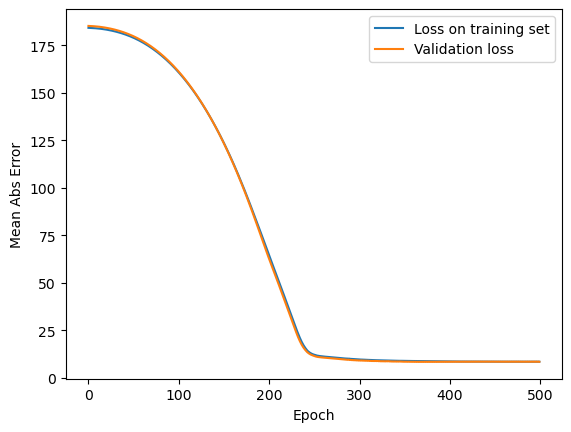

Testing Set Mean Absolute Error: 8.49


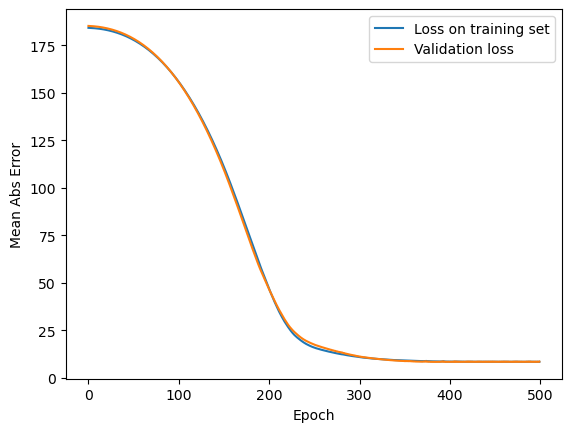

Testing Set Mean Absolute Error: 8.67


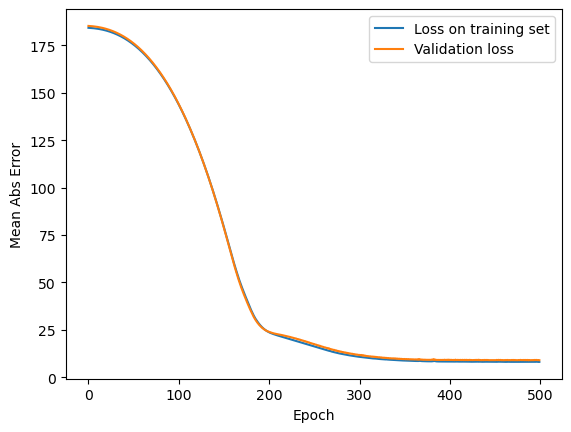

Testing Set Mean Absolute Error: 8.80


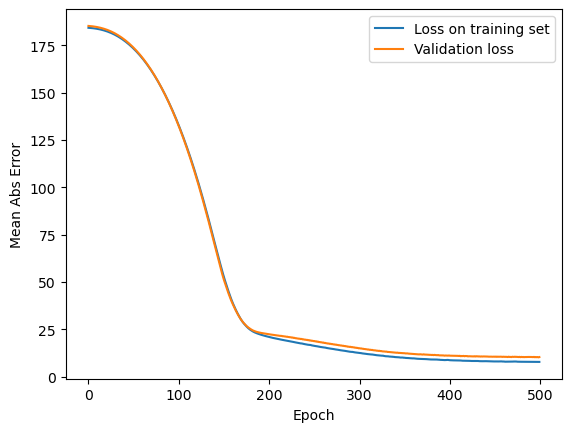

Testing Set Mean Absolute Error: 9.85


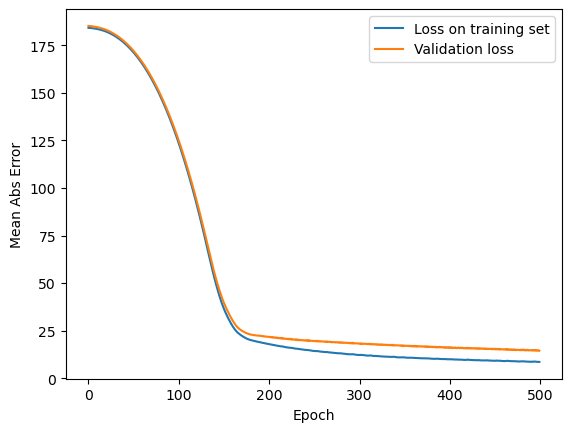

Testing Set Mean Absolute Error: 21.30


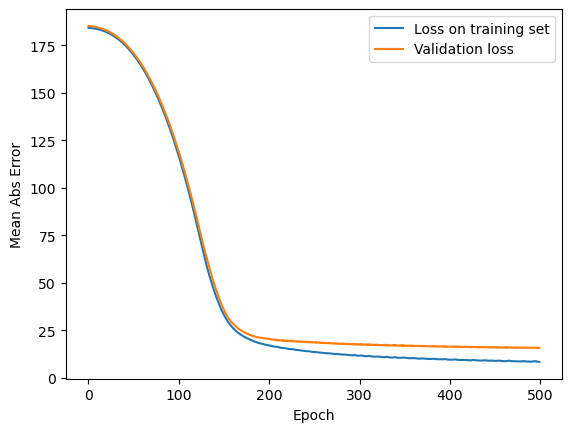

Testing Set Mean Absolute Error: 31.93


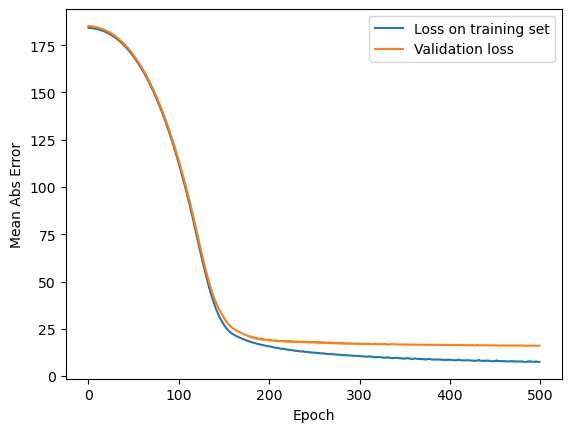

Testing Set Mean Absolute Error: 37.31


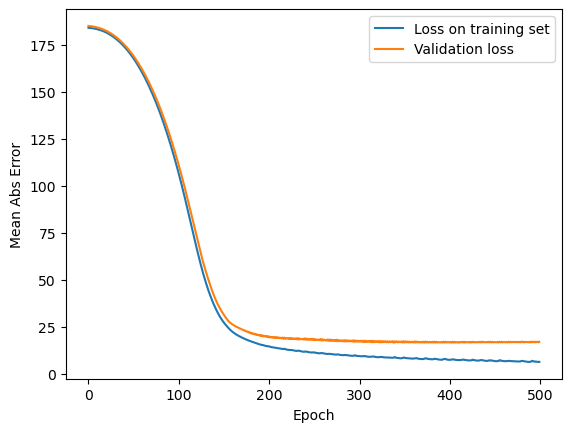

Testing Set Mean Absolute Error: 42.78


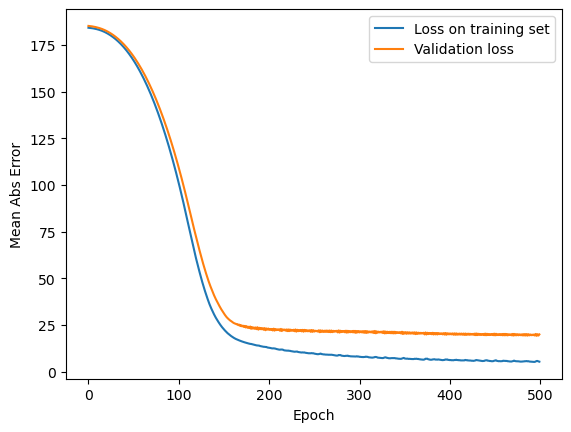

Testing Set Mean Absolute Error: 45.86


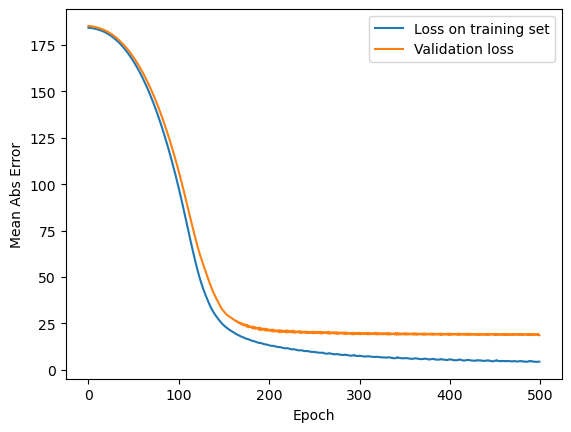

Testing Set Mean Absolute Error: 42.19


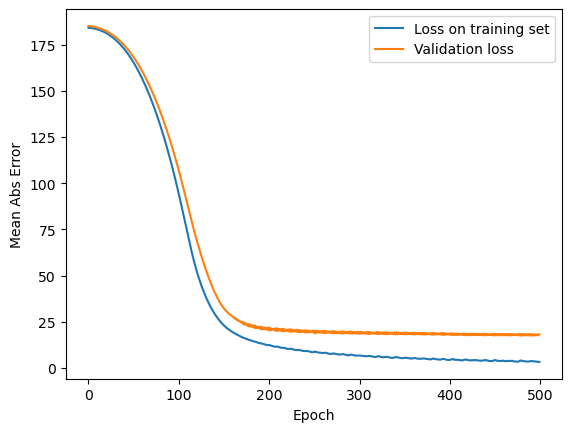

Testing Set Mean Absolute Error: 45.89


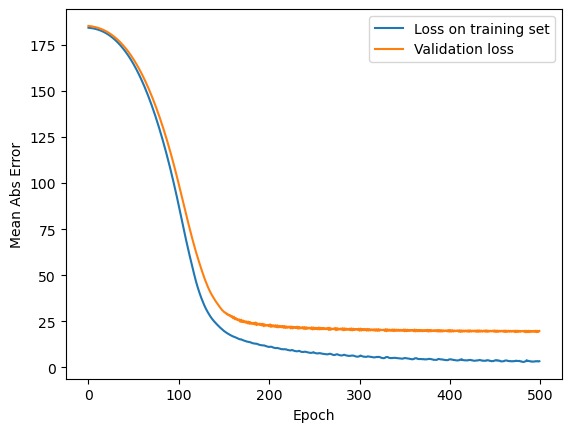

Testing Set Mean Absolute Error: 47.01


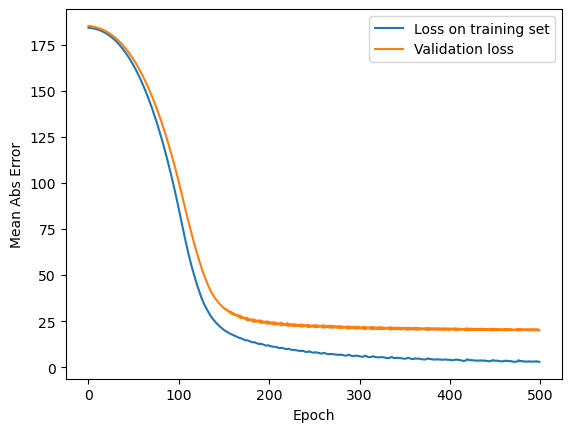

Testing Set Mean Absolute Error: 46.48


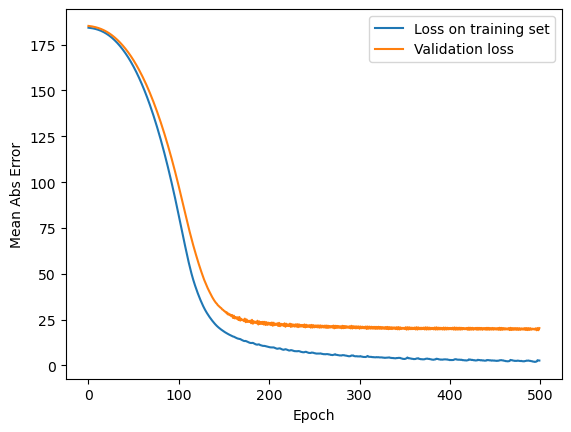

Testing Set Mean Absolute Error: 47.92


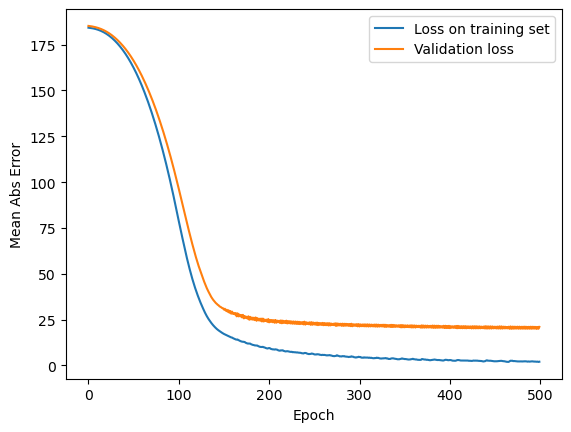

Testing Set Mean Absolute Error: 48.80


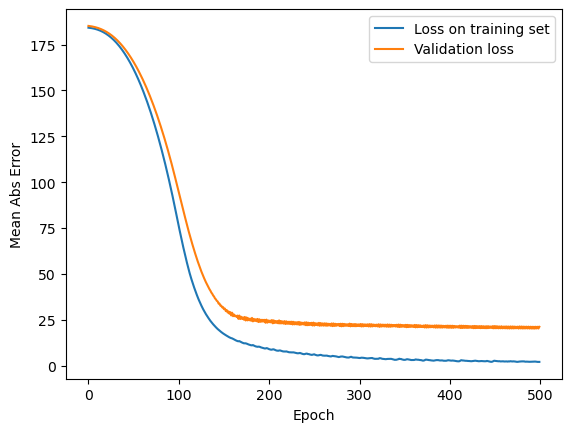

Testing Set Mean Absolute Error: 48.06


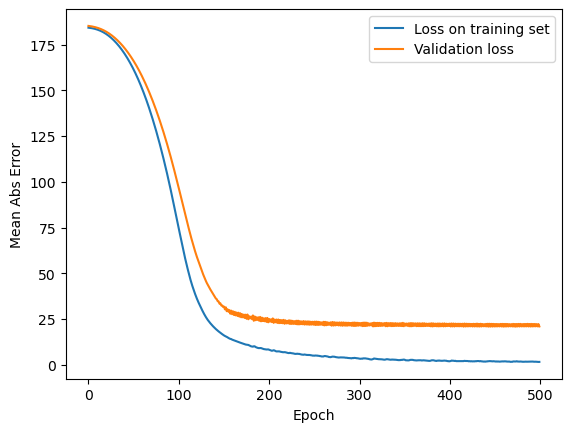

Testing Set Mean Absolute Error: 48.85


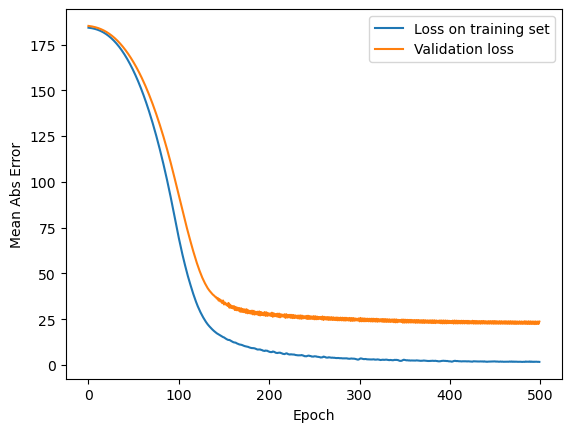

Testing Set Mean Absolute Error: 49.28


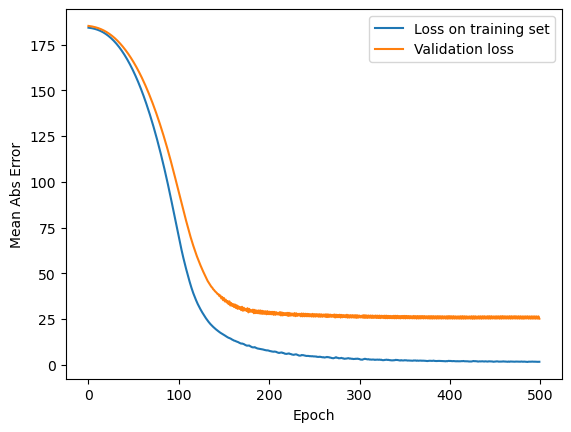

Testing Set Mean Absolute Error: 47.11


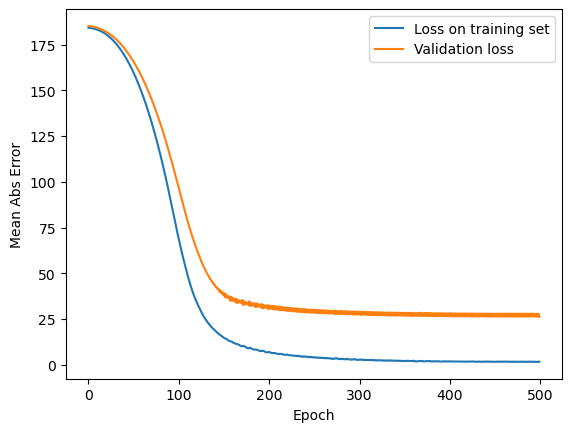

Testing Set Mean Absolute Error: 47.27


In [44]:
n = [1,2,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90] # components
trainloss = [] 
testloss = []

for component in n :
    pca = PCA(n_components=component)
    pca_train = pca.fit_transform(X_train)
    pca_test = pca.transform(X_test)

    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape=(pca_train.shape[1], ), kernel_initializer=kernel_init, bias_initializer=bias_init))
    model.add(Dense(64, activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init))
    #model.add(Dense(128, activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init))
    model.add(Dense(1, kernel_initializer=kernel_init, bias_initializer=bias_init))

# DEFINITION OF THE OPTIMIZER

    optimizer = optimizers.RMSprop(0.002) # Root Mean Squared Propagation

# This line matches the optimizer to the model and states which metrics will evaluate the model's accuracy
    model.compile(loss='mae', optimizer=optimizer, metrics=['mae'])

    history = model.fit(pca_train, y_train, batch_size=pca_train.shape[0], 
                    epochs=EPOCHS, verbose = False, shuffle=False, validation_split=0.2, callbacks=[PrintEpNum()])
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error')
    plt.plot(history.epoch, np.array(history.history['mae']),label='Loss on training set') 
    plt.plot(history.epoch, np.array(history.history['val_mae']),label = 'Validation loss')
    plt.legend()
    plt.show()
    [loss, mae] = model.evaluate(pca_test, y_test, verbose=0)
    testloss.append(loss)

    print("Testing Set Mean Absolute Error: {:2.2f}".format(mae))


    # test_predictions_pca = model.predict(X_test_pca).flatten()

# print("Elements in Test Set: ", labeled_elements)

    


In [45]:
testloss

[8.486577033996582,
 8.670848846435547,
 8.797205924987793,
 9.848763465881348,
 21.298595428466797,
 31.933551788330078,
 37.314605712890625,
 42.77924346923828,
 45.860965728759766,
 42.189903259277344,
 45.8881950378418,
 47.01100158691406,
 46.475059509277344,
 47.919681549072266,
 48.80134201049805,
 48.06412124633789,
 48.8508415222168,
 49.279930114746094,
 47.11073303222656,
 47.26728057861328]

Text(0, 0.5, 'mean absolute loss')

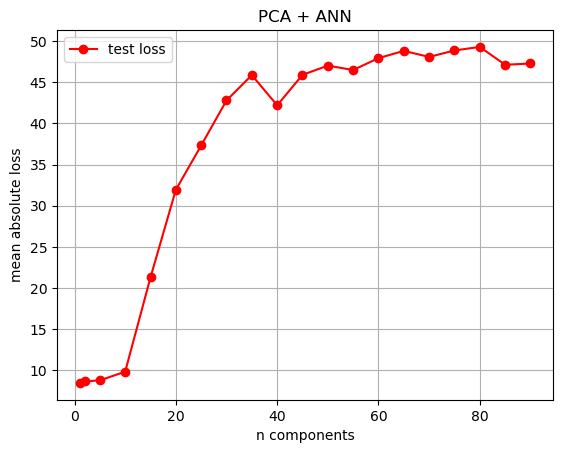

In [47]:

plt.plot(n,testloss, 'ro-', label='test loss')
plt.title("PCA + ANN")
plt.legend(loc=0)
plt.grid(True); plt.xlabel('n components'); plt.ylabel('mean absolute loss')

### This file starts from here

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df2, y_data, test_size=0.2, random_state=0)
print(X_train.shape)

(800, 400)


In [33]:
class PrintEpNum(keras.callbacks.Callback): # This is a function for the Epoch Counter
    def on_epoch_end(self, epoch, logs):
        sys.stdout.flush()
        sys.stdout.write("Current Epoch: " + str(epoch+1) + " Training Loss: " + "%4f" %logs.get('loss') + '                                       \r') # Updates current Epoch Number

EPOCHS = 1000 # Number of EPOCHS

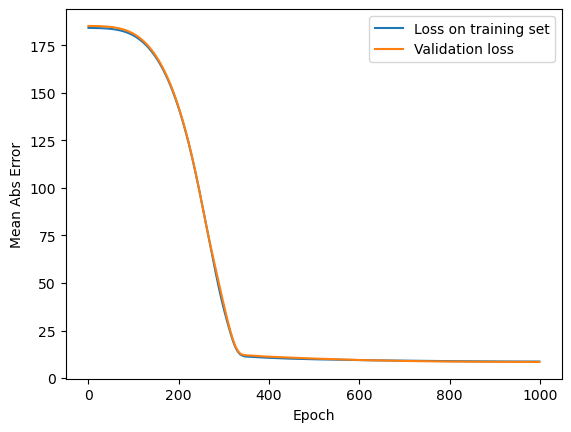

Testing Set Mean Absolute Error: 8.53


In [35]:
pca = PCA(n_components=1)
pca_train = pca.fit_transform(X_train)
pca_test = pca.transform(X_test)

kernel_init = initializers.RandomNormal(seed=0)
bias_init = initializers.Zeros()

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(pca_train.shape[1], ), kernel_initializer=kernel_init, bias_initializer=bias_init))
model.add(Dense(64, activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init))
#model.add(Dense(128, activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init))
model.add(Dense(1, kernel_initializer=kernel_init, bias_initializer=bias_init))

# DEFINITION OF THE OPTIMIZER

optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001) # Adam optimizer

# This line matches the optimizer to the model and states which metrics will evaluate the model's accuracy
model.compile(loss='mae', optimizer=optimizer, metrics=['mae'])

history = model.fit(pca_train, y_train, batch_size=pca_train.shape[0], 
                epochs=EPOCHS, verbose = False, shuffle=False, validation_split=0.2, callbacks=[PrintEpNum()])

plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error')
plt.plot(history.epoch, np.array(history.history['mae']),label='Loss on training set') 
plt.plot(history.epoch, np.array(history.history['val_mae']),label = 'Validation loss')
plt.legend()
plt.show()
[loss, mae] = model.evaluate(pca_test, y_test, verbose=0)

print("Testing Set Mean Absolute Error: {:2.2f}".format(mae))


In [49]:
test_predictions_pca = model.predict(pca_test).flatten()

# print("Elements in Test Set: ", labeled_elements)
print("Real Values", list(y_test))
print("Predictions", list(test_predictions_pca))

values_pca = np.concatenate((pca_train, pca_test), axis=0) # This line joins the values together to evaluate all of them
predictions_pca = model.predict(values_pca).flatten()

7/7 [==============================] - 0s 922us/step
Real Values [-180.872821978971, -188.305413266689, -187.365623922152, -191.24855569452, -173.698538608387, -177.344270255559, -183.491649494111, -166.697996429997, -185.44545280443, -166.333315253494, -181.474778530997, -183.499004127911, -178.836979681952, -187.78664856574, -183.857588485858, -184.527425436853, -204.074358809481, -196.024083443804, -183.000345587603, -169.263064134405, -196.512039551403, -174.07628117982, -191.104151549183, -199.362901324829, -194.008701658122, -165.566365989518, -191.797164620076, -184.134754927474, -176.986968942571, -178.233750049794, -189.689380506692, -186.444962868882, -178.265121680268, -187.157346506319, -187.752149763217, -188.057077761252, -180.825485766718, -181.337811593967, -183.859156709306, -181.711672673291, -192.402328442501, -176.683345417648, -181.601928421108, -160.524051776988, -180.380332958023, -182.464395868219, -198.571229172063, -175.716110443785, -180.978151653403, -192.86

In [52]:
import plotly
import plotly.graph_objs as go
from plotly.offline import iplot

plotly.offline.init_notebook_mode(connected=True)

layout0= go.Layout(title=go.layout.Title(text="Neural Network Model - SFE", font=dict(size=28)), hovermode= 'closest', width = 1000, height=600, showlegend=True,  # Hovermode establishes the way the labels that appear when you hover are arranged # Establishing a square plot width=height
    xaxis= dict(title=go.layout.xaxis.Title(text='Real Values', font=dict(size=24)), zeroline= False, gridwidth= 1, tickfont=dict(size=18)), # Axis Titles. Removing the X-axis Mark. Adding a Grid
    yaxis= dict(title=go.layout.yaxis.Title(text='Prediction', font=dict(size=24)), zeroline= False, gridwidth= 1, tickfont=dict(size=18)), # Axis Titles. Removing the Y-axis Mark. Adding a Grid
    legend=dict(font=dict(size=24))) # Adding a legend

trace0 = go.Scatter(x = y_data, y = predictions_pca, mode = 'markers', marker= dict(size= 12, color= 'blue'),  name = 'SFE (Training)')
trace1 = go.Scatter(x = y_test, y = test_predictions_pca, mode = 'markers', marker= dict(size= 12, color= 'red'),  name = 'SFE (Testing)')
trace2 = go.Scatter(x = [-250,-100], y = [-250,-100], mode = 'lines', name = "Match") # This trace is the line X = Y which would indicate that the Prediction equals the real value

data = [trace1, trace2]
fig= go.Figure(data, layout=layout0)
iplot(fig)